## **Project Proposal**
The objective of this project is to forecast monthly carbon dioxide (CO2) levels using [Mauna Lua CO2 dataset (monthly)](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv) for three different machine learning modeling approaches: 
- **Multilayer Perceptron (MLP)**
- **Moving Average (MA)**
- **Auto Regressive Moving Average (ARMA)**
  
The study will investigate the performance of each model by utilizing previous `K` readings to predict the next `T` reading, providing insights into their effectiveness for CO2 level forecasting.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
import torch.optim as optim

# Interactive widget
from ipywidgets import interact

# Retina mode
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\HP\AppData\Local\Temp\ipykernel_12404\3880631260.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
names = 'year,month,decimal date,average,deseasonalized,ndays,sdev,unc'.split(',')
df = pd.read_csv('co2_mm_mlo.csv', index_col=False)
df

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
787,2023,10,2023.7917,418.82,422.12,27,0.47,0.17
788,2023,11,2023.8750,420.46,422.46,21,0.91,0.38
789,2023,12,2023.9583,421.86,422.58,20,0.68,0.29
790,2024,1,2024.0417,422.80,422.45,27,0.73,0.27


In [3]:
df.index = pd.to_datetime(df[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))
df

C:\Users\HP\AppData\Local\Temp\ipykernel_12404\4119832841.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.index = pd.to_datetime(df[['year', 'month']].apply(lambda x: '{}-{}'.format(x[0], x[1]), axis=1))


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
1958-03-01,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1958-04-01,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05-01,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
1958-06-01,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
1958-07-01,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
2023-10-01,2023,10,2023.7917,418.82,422.12,27,0.47,0.17
2023-11-01,2023,11,2023.8750,420.46,422.46,21,0.91,0.38
2023-12-01,2023,12,2023.9583,421.86,422.58,20,0.68,0.29
2024-01-01,2024,1,2024.0417,422.80,422.45,27,0.73,0.27


**Dataset Visualization**

In [4]:
# X = months since first measurement
X = np.array(range(len(df)))
y=df['average'].to_numpy()

Text(0, 0.5, 'CO2 Level')

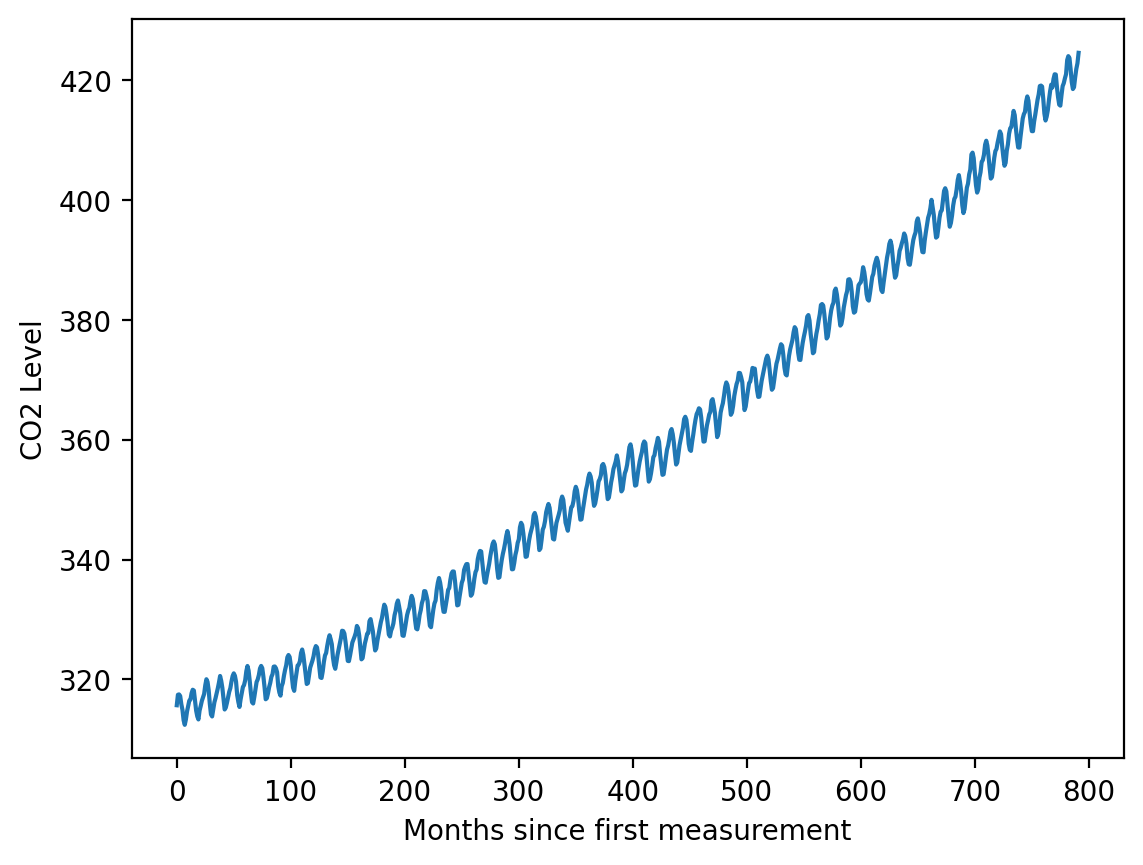

In [5]:
plt.plot(X, y)
plt.xlabel('Months since first measurement')
plt.ylabel('CO2 Level')

---

**Dataset Splitting without Shuffling**

In [6]:
def split(X, y, train_size):
  split_index = int(train_size * len(X))
  X_train = X[:split_index]
  X_test = X[split_index:]
  y_train = y[:split_index]
  y_test = y[split_index:]

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X,y,0.8)
y_train


array([315.7 , 317.45, 317.51, 317.24, 315.86, 314.93, 313.2 , 312.43,
       313.33, 314.67, 315.58, 316.48, 316.65, 317.72, 318.29, 318.15,
       316.54, 314.8 , 313.84, 313.33, 314.81, 315.58, 316.43, 316.98,
       317.58, 319.03, 320.04, 319.59, 318.18, 315.9 , 314.17, 313.83,
       315.  , 316.19, 316.89, 317.7 , 318.54, 319.48, 320.58, 319.77,
       318.57, 316.79, 314.99, 315.31, 316.1 , 317.01, 317.94, 318.55,
       319.68, 320.57, 321.02, 320.62, 319.61, 317.4 , 316.25, 315.42,
       316.69, 317.7 , 318.74, 319.07, 319.86, 321.38, 322.25, 321.48,
       319.74, 317.77, 316.21, 315.99, 317.07, 318.35, 319.57, 320.01,
       320.74, 321.84, 322.26, 321.89, 320.44, 318.69, 316.7 , 316.87,
       317.68, 318.71, 319.44, 320.44, 320.89, 322.14, 322.17, 321.87,
       321.21, 318.87, 317.81, 317.3 , 318.87, 319.42, 320.62, 321.6 ,
       322.39, 323.7 , 324.08, 323.75, 322.38, 320.36, 318.64, 318.1 ,
       319.78, 321.03, 322.33, 322.5 , 323.04, 324.42, 325.  , 324.09,
      

**Making Dataset from previous K months**

In [7]:
def make_dataset(X, y, K, T):
    X_made = []
    y_made = []
    for i in range(0,len(y)-K-T, T):
        X_made.append(y[i:(i+K)])
        y_made.append(y[(i+K):(i+K+T)])
    return np.array(X_made), np.array(y_made)
    

**Can change the value of K (previous readings) and T (forecasting months)**

In [8]:
K  = 30
T = 1

In [9]:
X_K, y_K= make_dataset(X, y, K, T) # For whole dataset
X_train_K, y_train_K= make_dataset(X_train, y_train, K, T) # For train
X_test_K, y_test_K = make_dataset(X_test, y_test, K, T) # for test
 

In [10]:
X_train_K

array([[315.7 , 317.45, 317.51, ..., 319.59, 318.18, 315.9 ],
       [317.45, 317.51, 317.24, ..., 318.18, 315.9 , 314.17],
       [317.51, 317.24, 315.86, ..., 315.9 , 314.17, 313.83],
       ...,
       [386.06, 386.28, 387.34, ..., 393.21, 392.38, 390.41],
       [386.28, 387.34, 388.78, ..., 392.38, 390.41, 388.54],
       [387.34, 388.78, 387.99, ..., 390.41, 388.54, 387.03]])

**MLP Model with 4 hidden Layers**

In [11]:
class MLP(nn.Module):
    def __init__(self, K, h1, h2, h3, h4, T):
        super(MLP, self).__init__()
        self.mlp1 = nn.Linear(K, h1)
        self.mlp2 = nn.Linear(h1, h2)
        self.mlp3 = nn.Linear(h2, h3)
        self.mlp4 = nn.Linear(h3, h4)
        self.mlp5 = nn.Linear(h4, T)
        
    def forward(self, x):
        x = F.relu(self.mlp1(x))
        x = F.relu(self.mlp2(x))
        x = F.relu(self.mlp3(x))
        x = F.relu(self.mlp4(x))
        x = self.mlp5(x)
        return x


In [12]:
mlp_model = MLP(K,128,256,512,128,T)

**Training the model**

In [13]:
def train(model, X_train, y_train, epochs=1000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    X_train_tensor = torch.tensor(X_train, dtype=torch.float)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float)
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()
        print(f'epoch {epoch+1}, loss {loss.item():.4f}')

In [14]:
train(mlp_model, X_train_K, y_train_K,3000, 0.001)

epoch 1, loss 119627.4141
epoch 2, loss 88601.2344
epoch 3, loss 62671.1836
epoch 4, loss 36242.6914
epoch 5, loss 11693.0430
epoch 6, loss 7.0473
epoch 7, loss 14294.9619
epoch 8, loss 24918.1113
epoch 9, loss 16711.6230
epoch 10, loss 5461.9014
epoch 11, loss 252.7152
epoch 12, loss 1094.5283
epoch 13, loss 4520.4146
epoch 14, loss 7561.3779
epoch 15, loss 8870.1299
epoch 16, loss 8310.3486
epoch 17, loss 6296.7061
epoch 18, loss 3602.6470
epoch 19, loss 1197.0914
epoch 20, loss 32.2390
epoch 21, loss 582.5906
epoch 22, loss 2247.9163
epoch 23, loss 3537.8667
epoch 24, loss 3434.5471
epoch 25, loss 2184.6113
epoch 26, loss 791.4280
epoch 27, loss 57.9372
epoch 28, loss 143.2991
epoch 29, loss 715.5422
epoch 30, loss 1312.8500
epoch 31, loss 1597.2957
epoch 32, loss 1458.8463
epoch 33, loss 994.5677
epoch 34, loss 440.8364
epoch 35, loss 65.9123
epoch 36, loss 38.6020
epoch 37, loss 313.0912
epoch 38, loss 627.8175
epoch 39, loss 728.2568
epoch 40, loss 559.8995
epoch 41, loss 268.447

In [15]:
X_train_K.shape

(602, 30)

**Visualizing the Prediction of MLP for the Whole Dataset (X)**

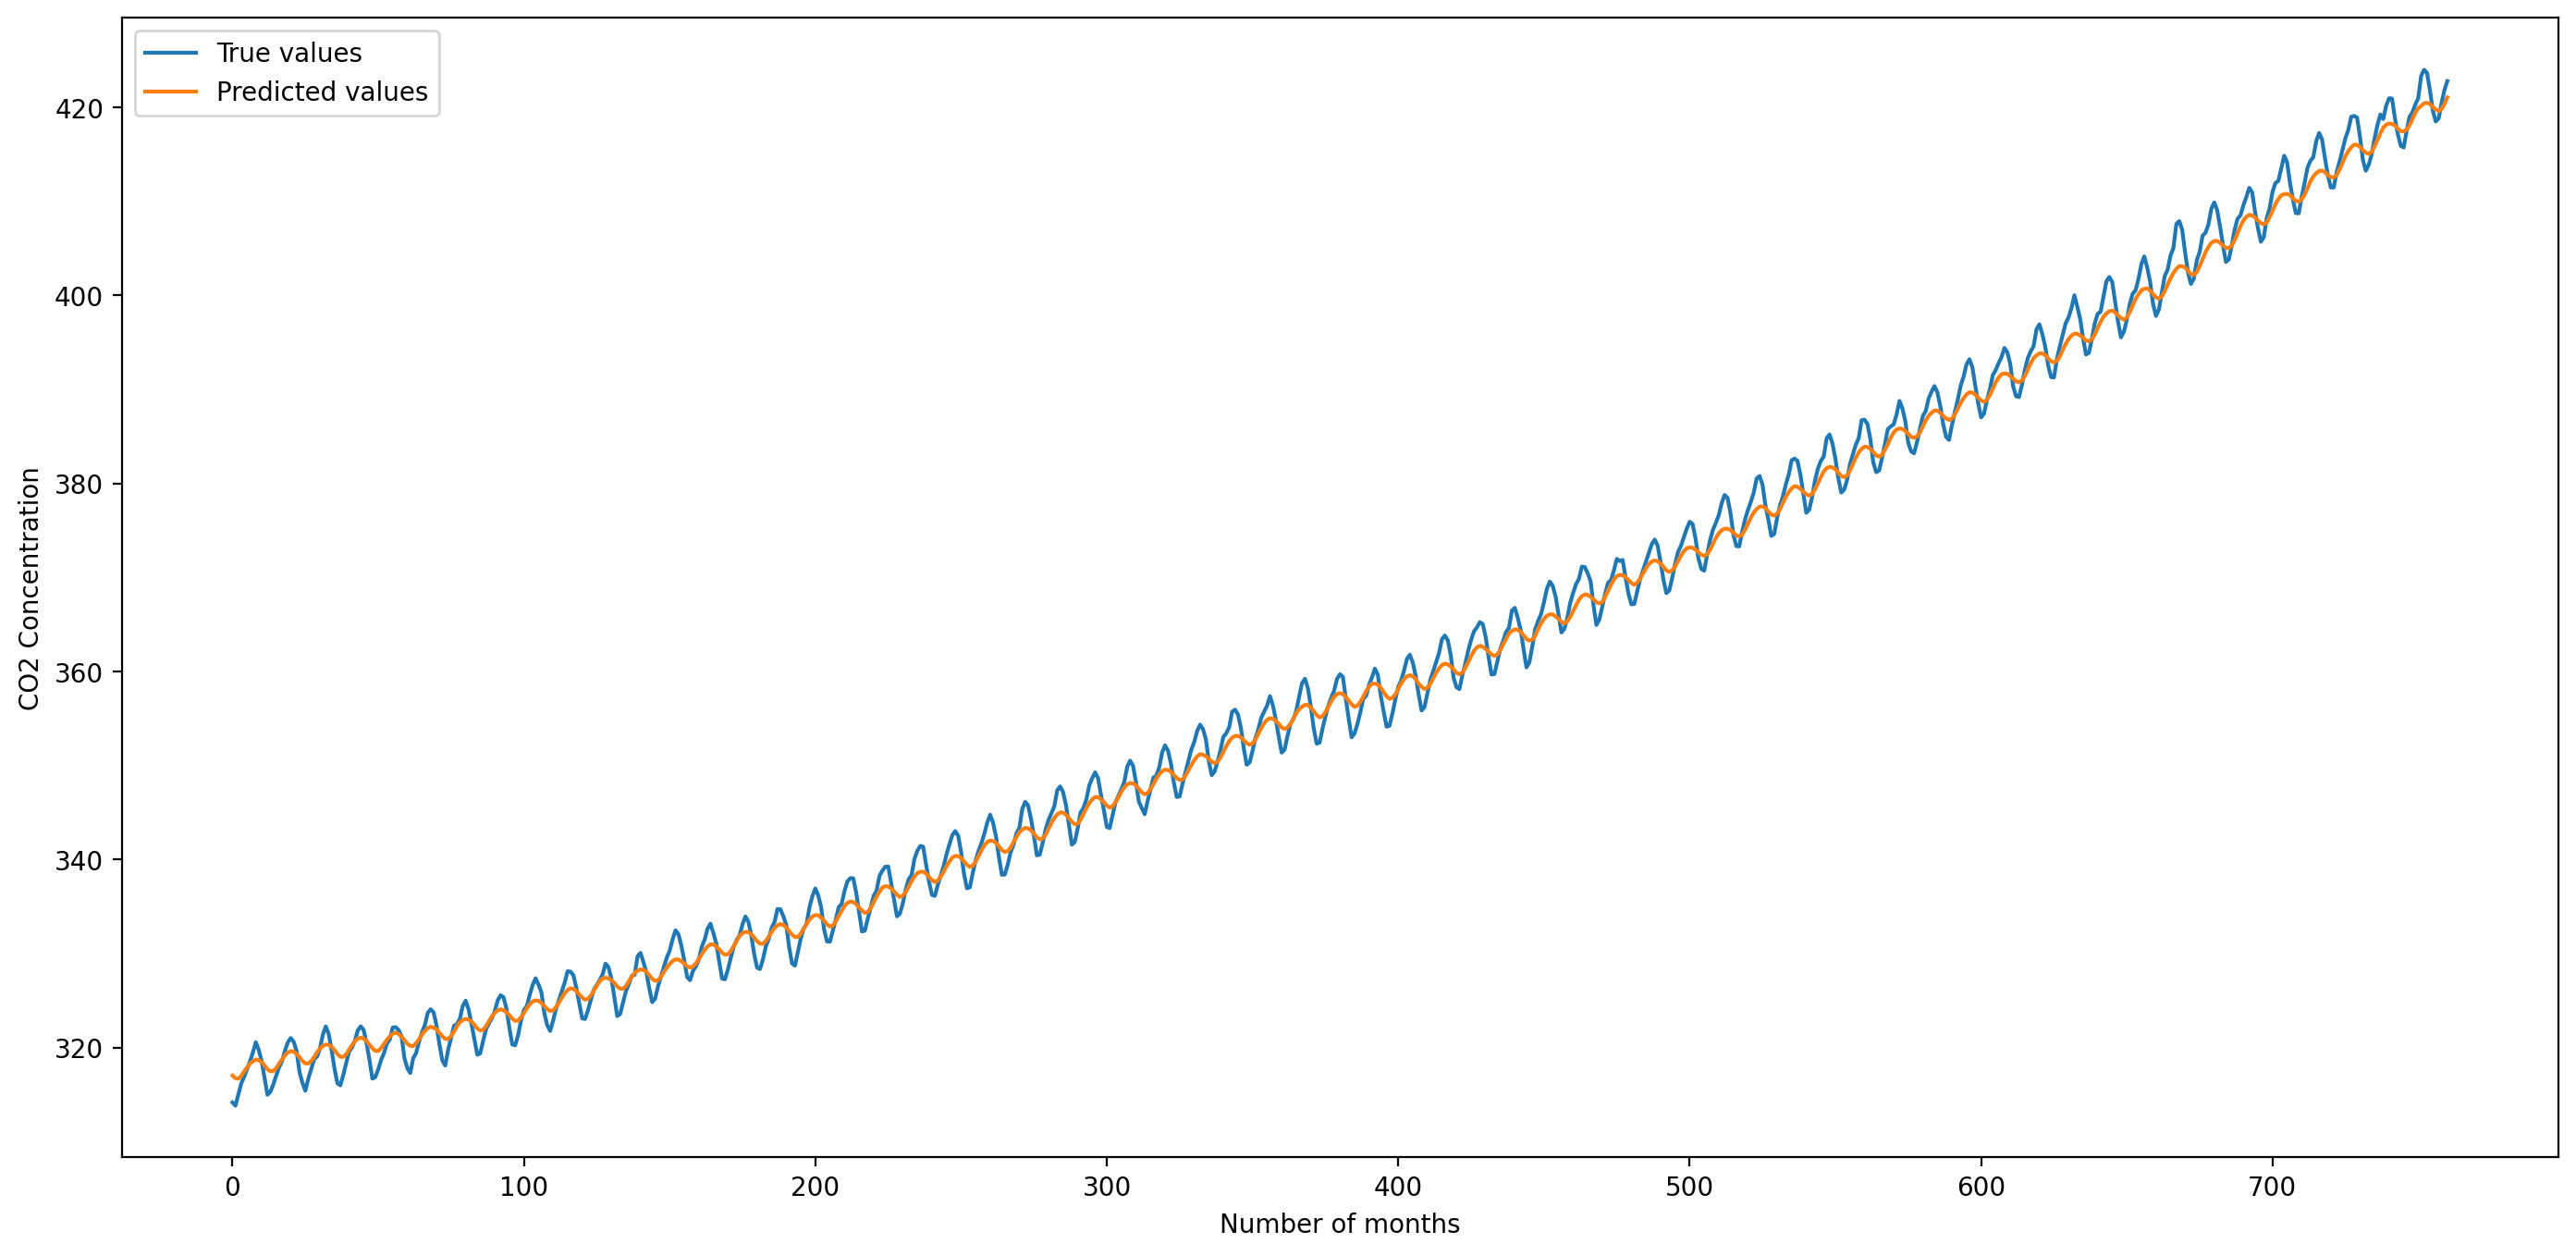

In [16]:
y_pred_K = mlp_model(torch.tensor(X_K).float()).detach().numpy().flatten()

plt.figure(figsize=(17, 8))
plt.xlabel("Number of months")
plt.ylabel("CO2 Concentration")
plt.plot(y_K, label='True values')
plt.plot(y_pred_K, label='Predicted values')
plt.legend()
plt.show()

**Visualizing the Prediction of MLP for the Test Dataset (X_test)**

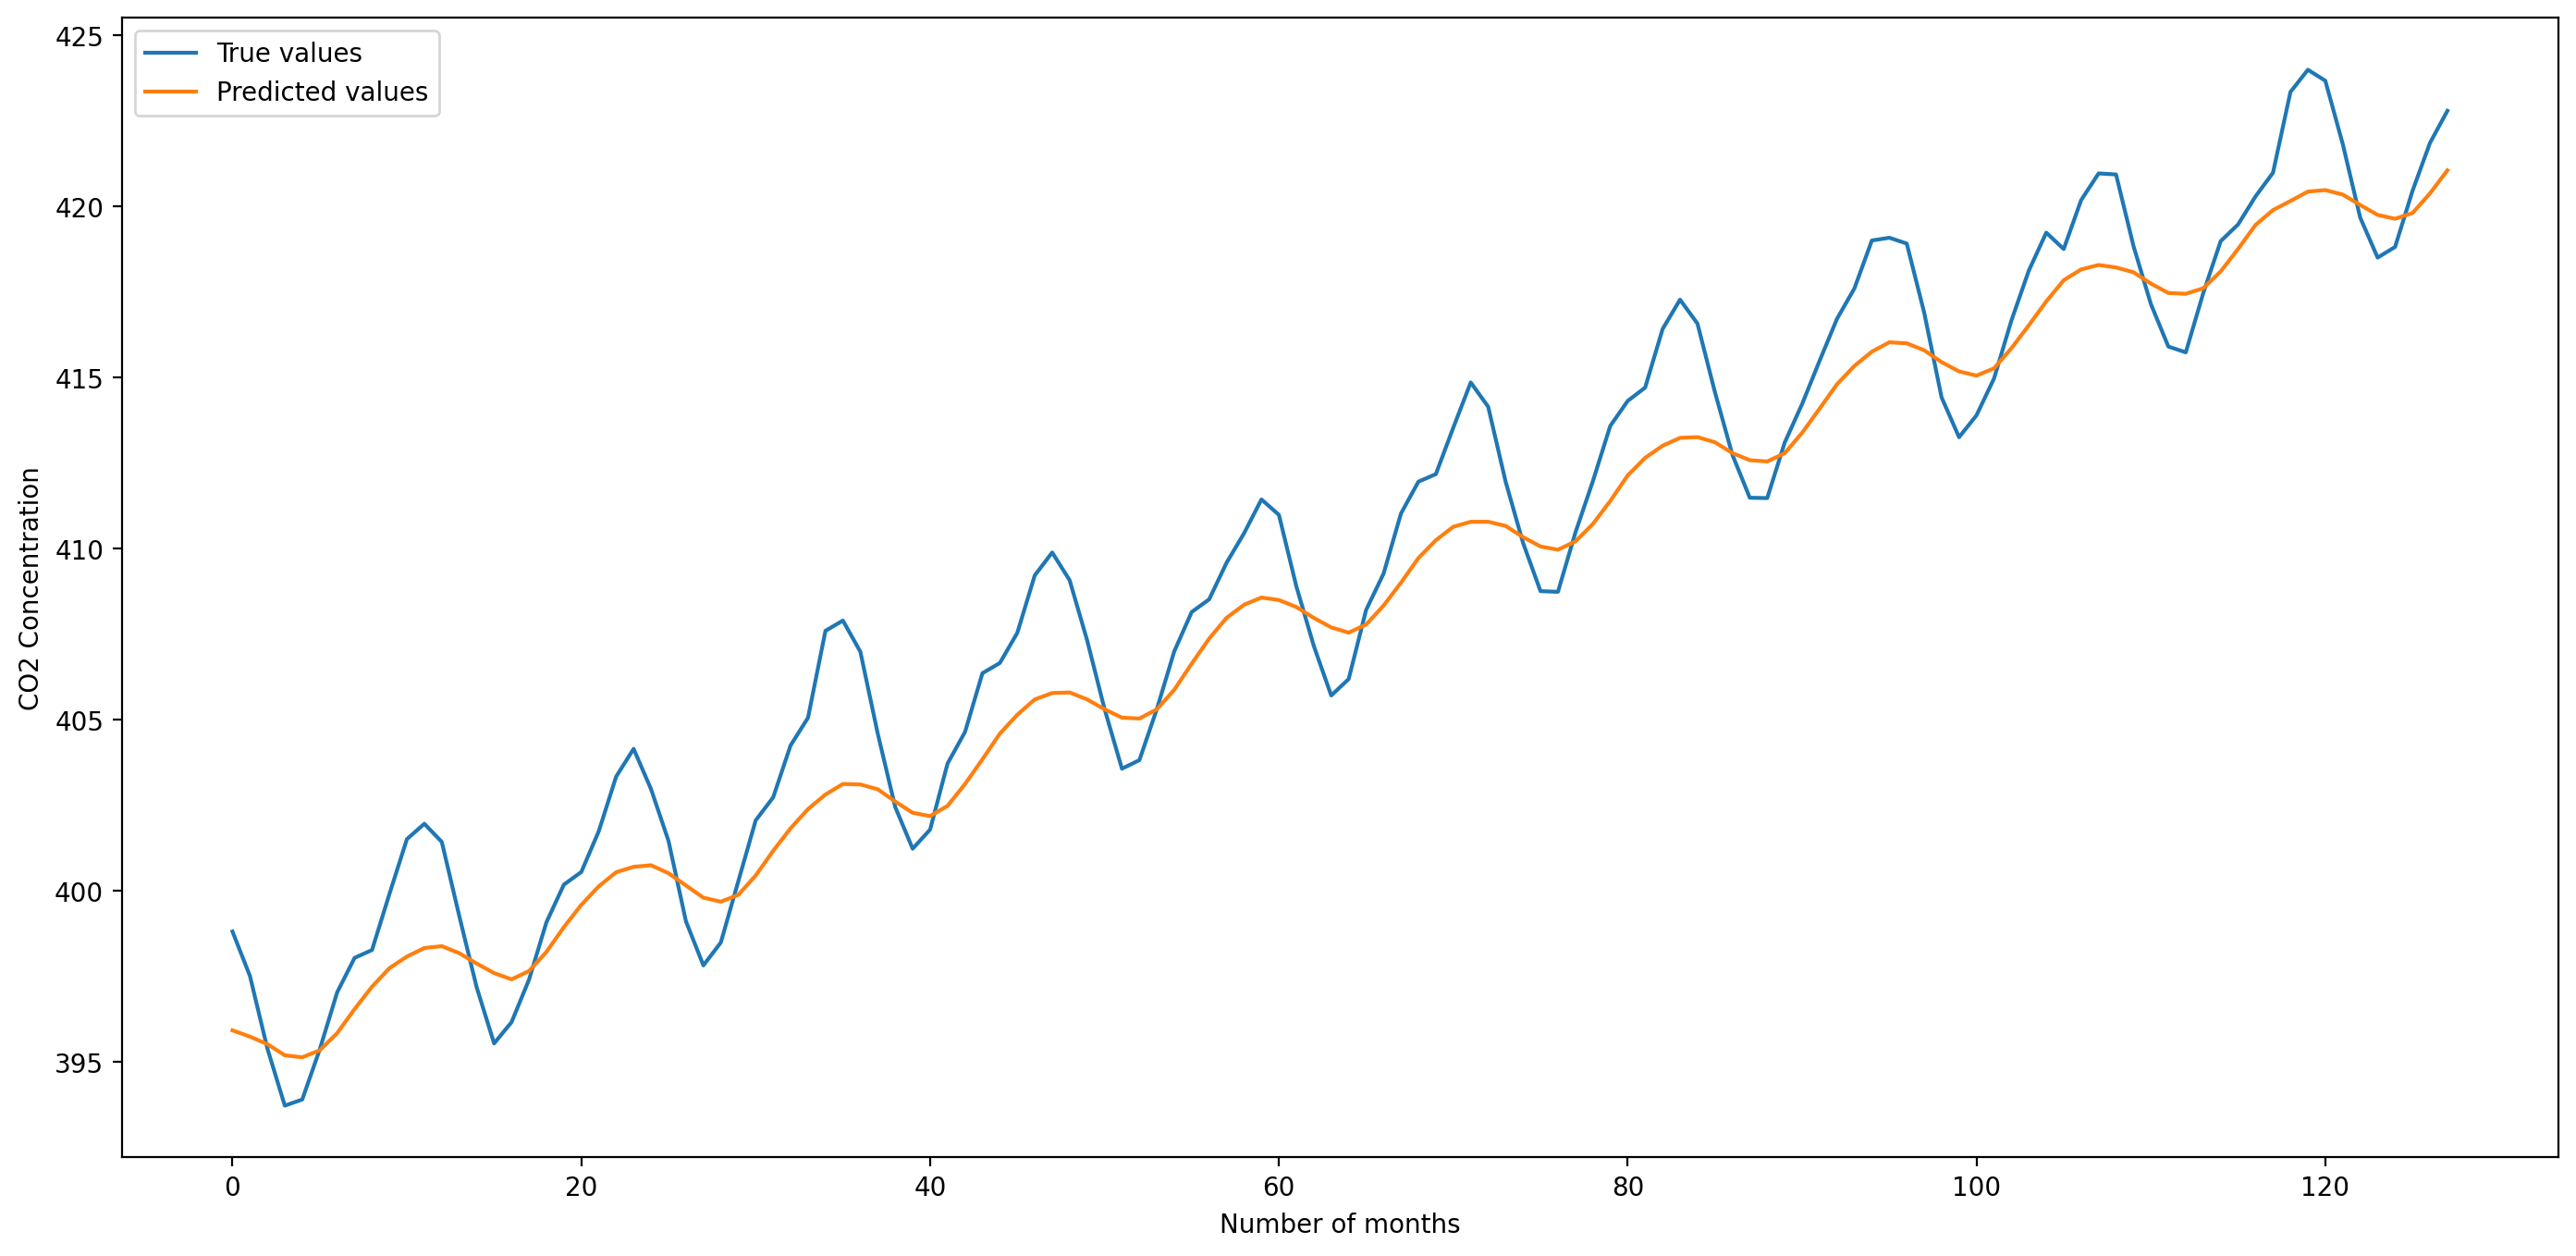

In [17]:
y_test_pred_K = mlp_model(torch.tensor(X_test_K).float()).detach().numpy().flatten()

plt.figure(figsize=(17, 8))
plt.xlabel("Number of months")
plt.ylabel("CO2 Concentration")
plt.plot(y_test_K, label='True values')
plt.plot(y_test_pred_K, label='Predicted values')
plt.legend()
plt.show()

**MSE for the MLP Forescasting**

In [18]:
y_test_pred_K = mlp_model(torch.tensor(X_test_K).float()).detach().numpy().flatten()
print("MSE Forecasting on test data :",mse(y_test_K, y_test_pred_K))

MSE Forecasting on test data : 4.1312329240278185


---

**Calculating the Moving Average (MA)**

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
moving_avg_model = SARIMAX(y_train, order=(0,2,2),seasonal_order=(0,2,1,12)).fit()
moving_avg_pred = moving_avg_model.predict(start=0, end=len(X)-1)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


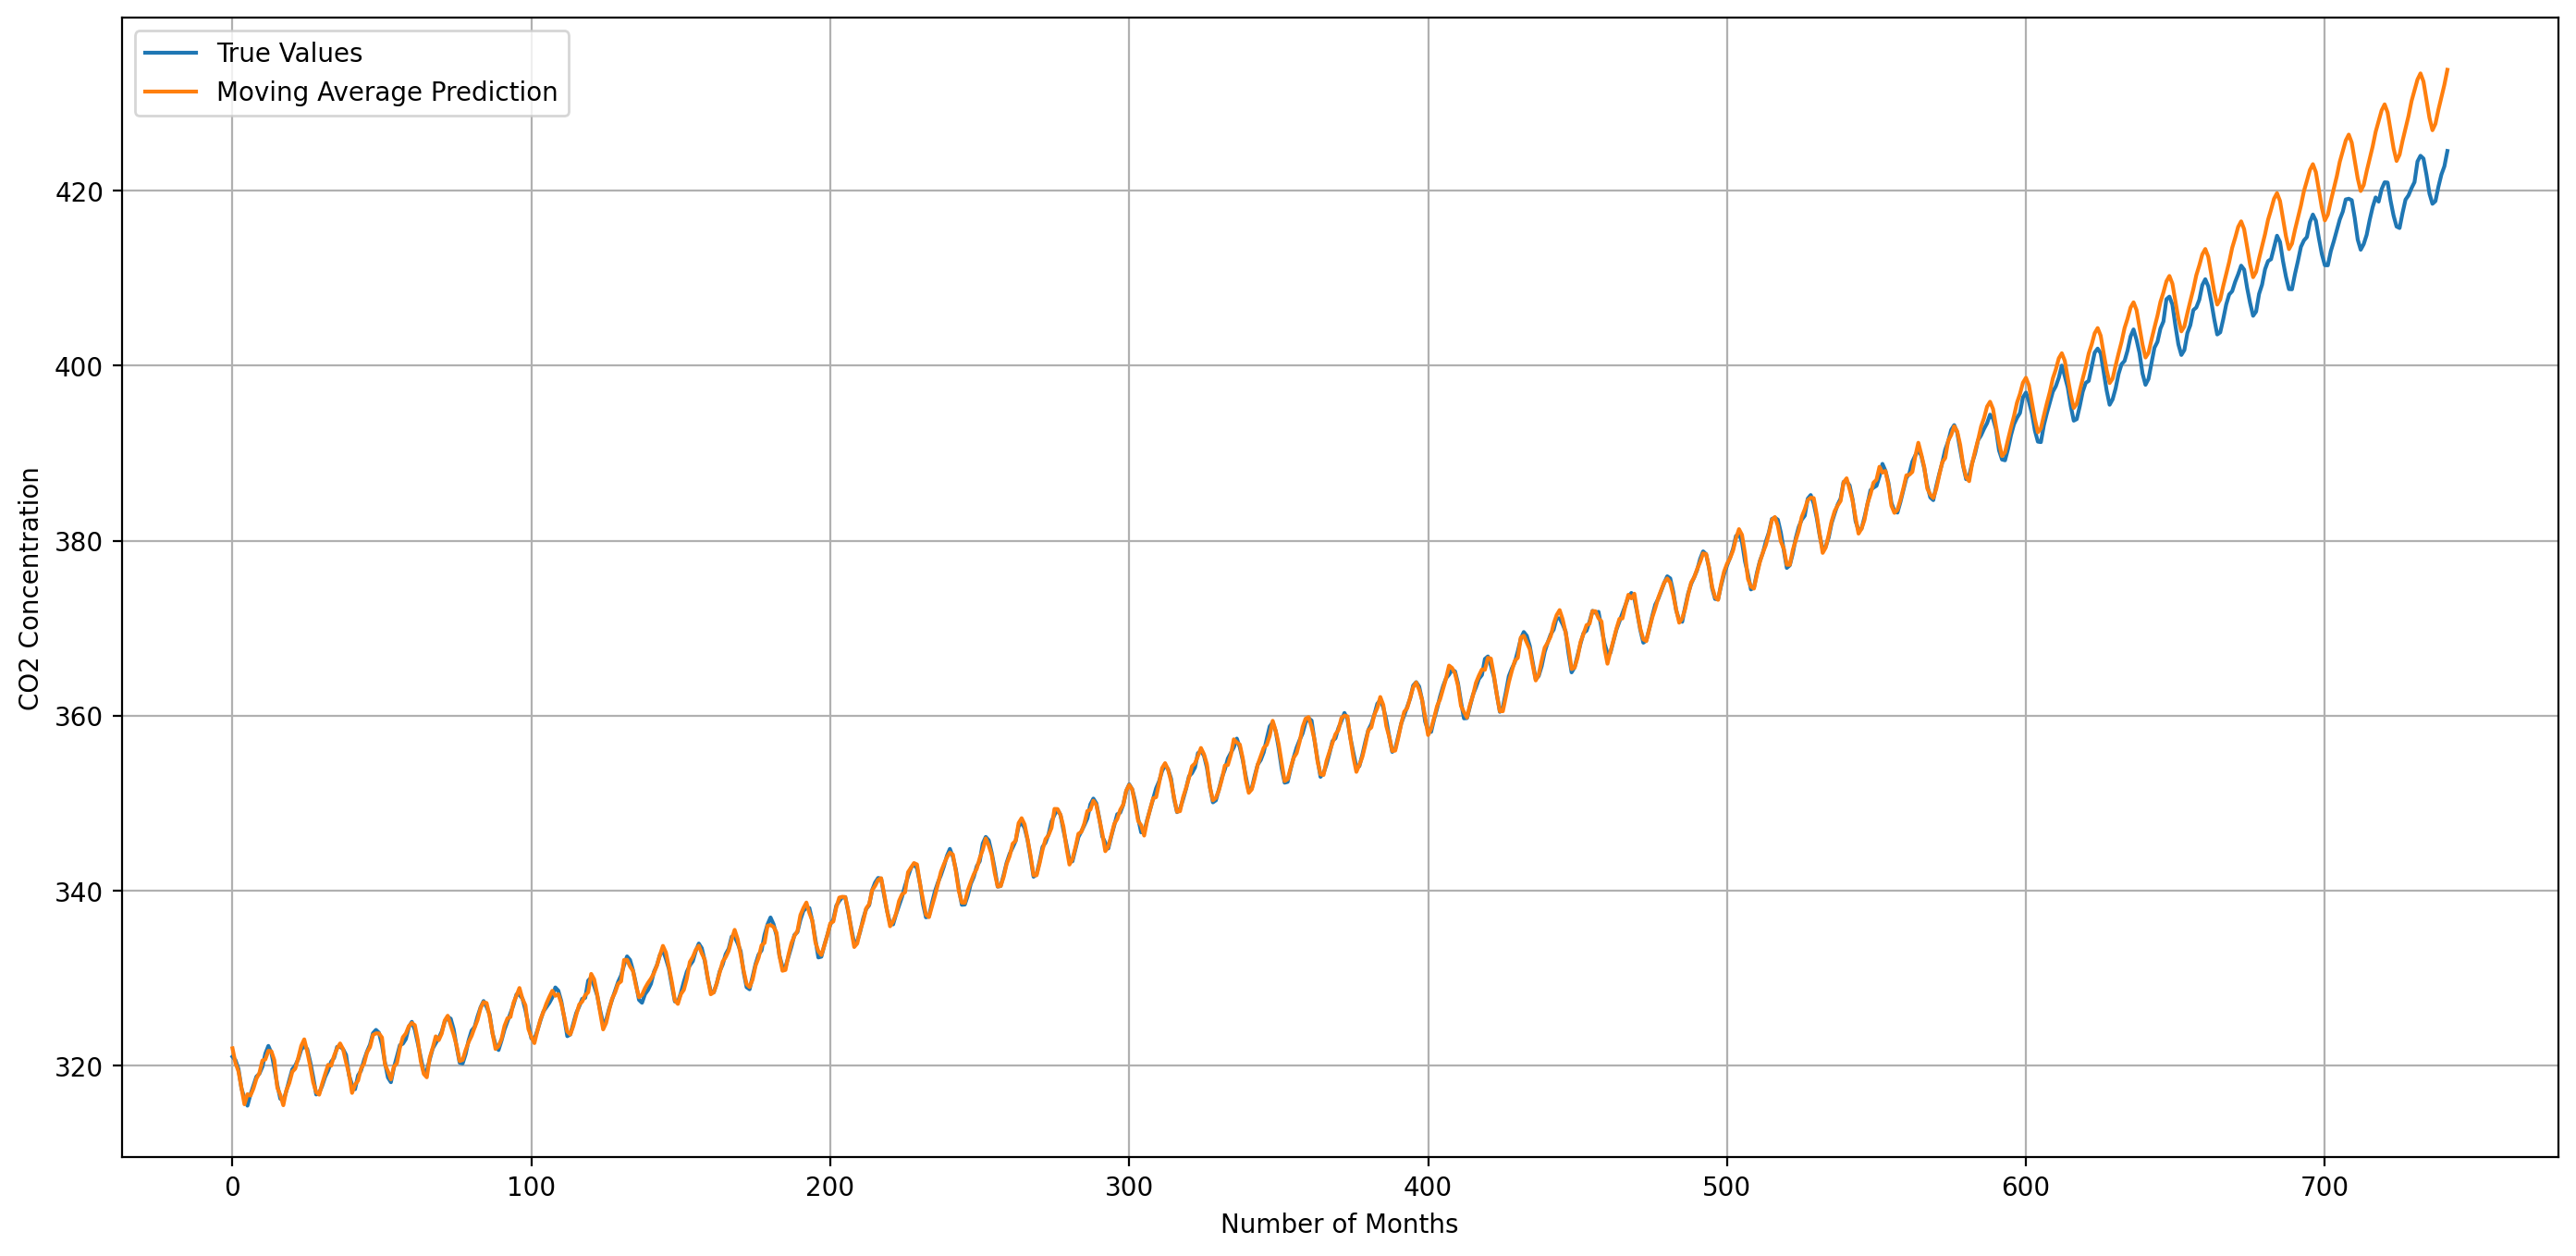

In [21]:
plt.figure(figsize=(17, 8))
plt.plot(y[50:], label='True Values')
plt.plot(moving_avg_pred[50:], label='Moving Average Prediction')
plt.xlabel("Number of Months")
plt.ylabel("CO2 Concentration")
plt.grid()
plt.legend()
plt.show()

**MSE between Moving Average and dataset average (y)**

In [22]:
print(f"MSE between Moving Average and dataset average (y): {mse(moving_avg_pred,y)}")

MSE between Moving Average and dataset average (y): 292.64060314143813


**Function to calculate the Auto Regressive Moving Average (ARMA)**

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
ARMA_model = ARIMA(y_train, order=(10, 2, 0))
ARMA_model_fit = ARMA_model.fit()
ARMA_pred=ARMA_model_fit.predict(start=0, end=len(X)-1)

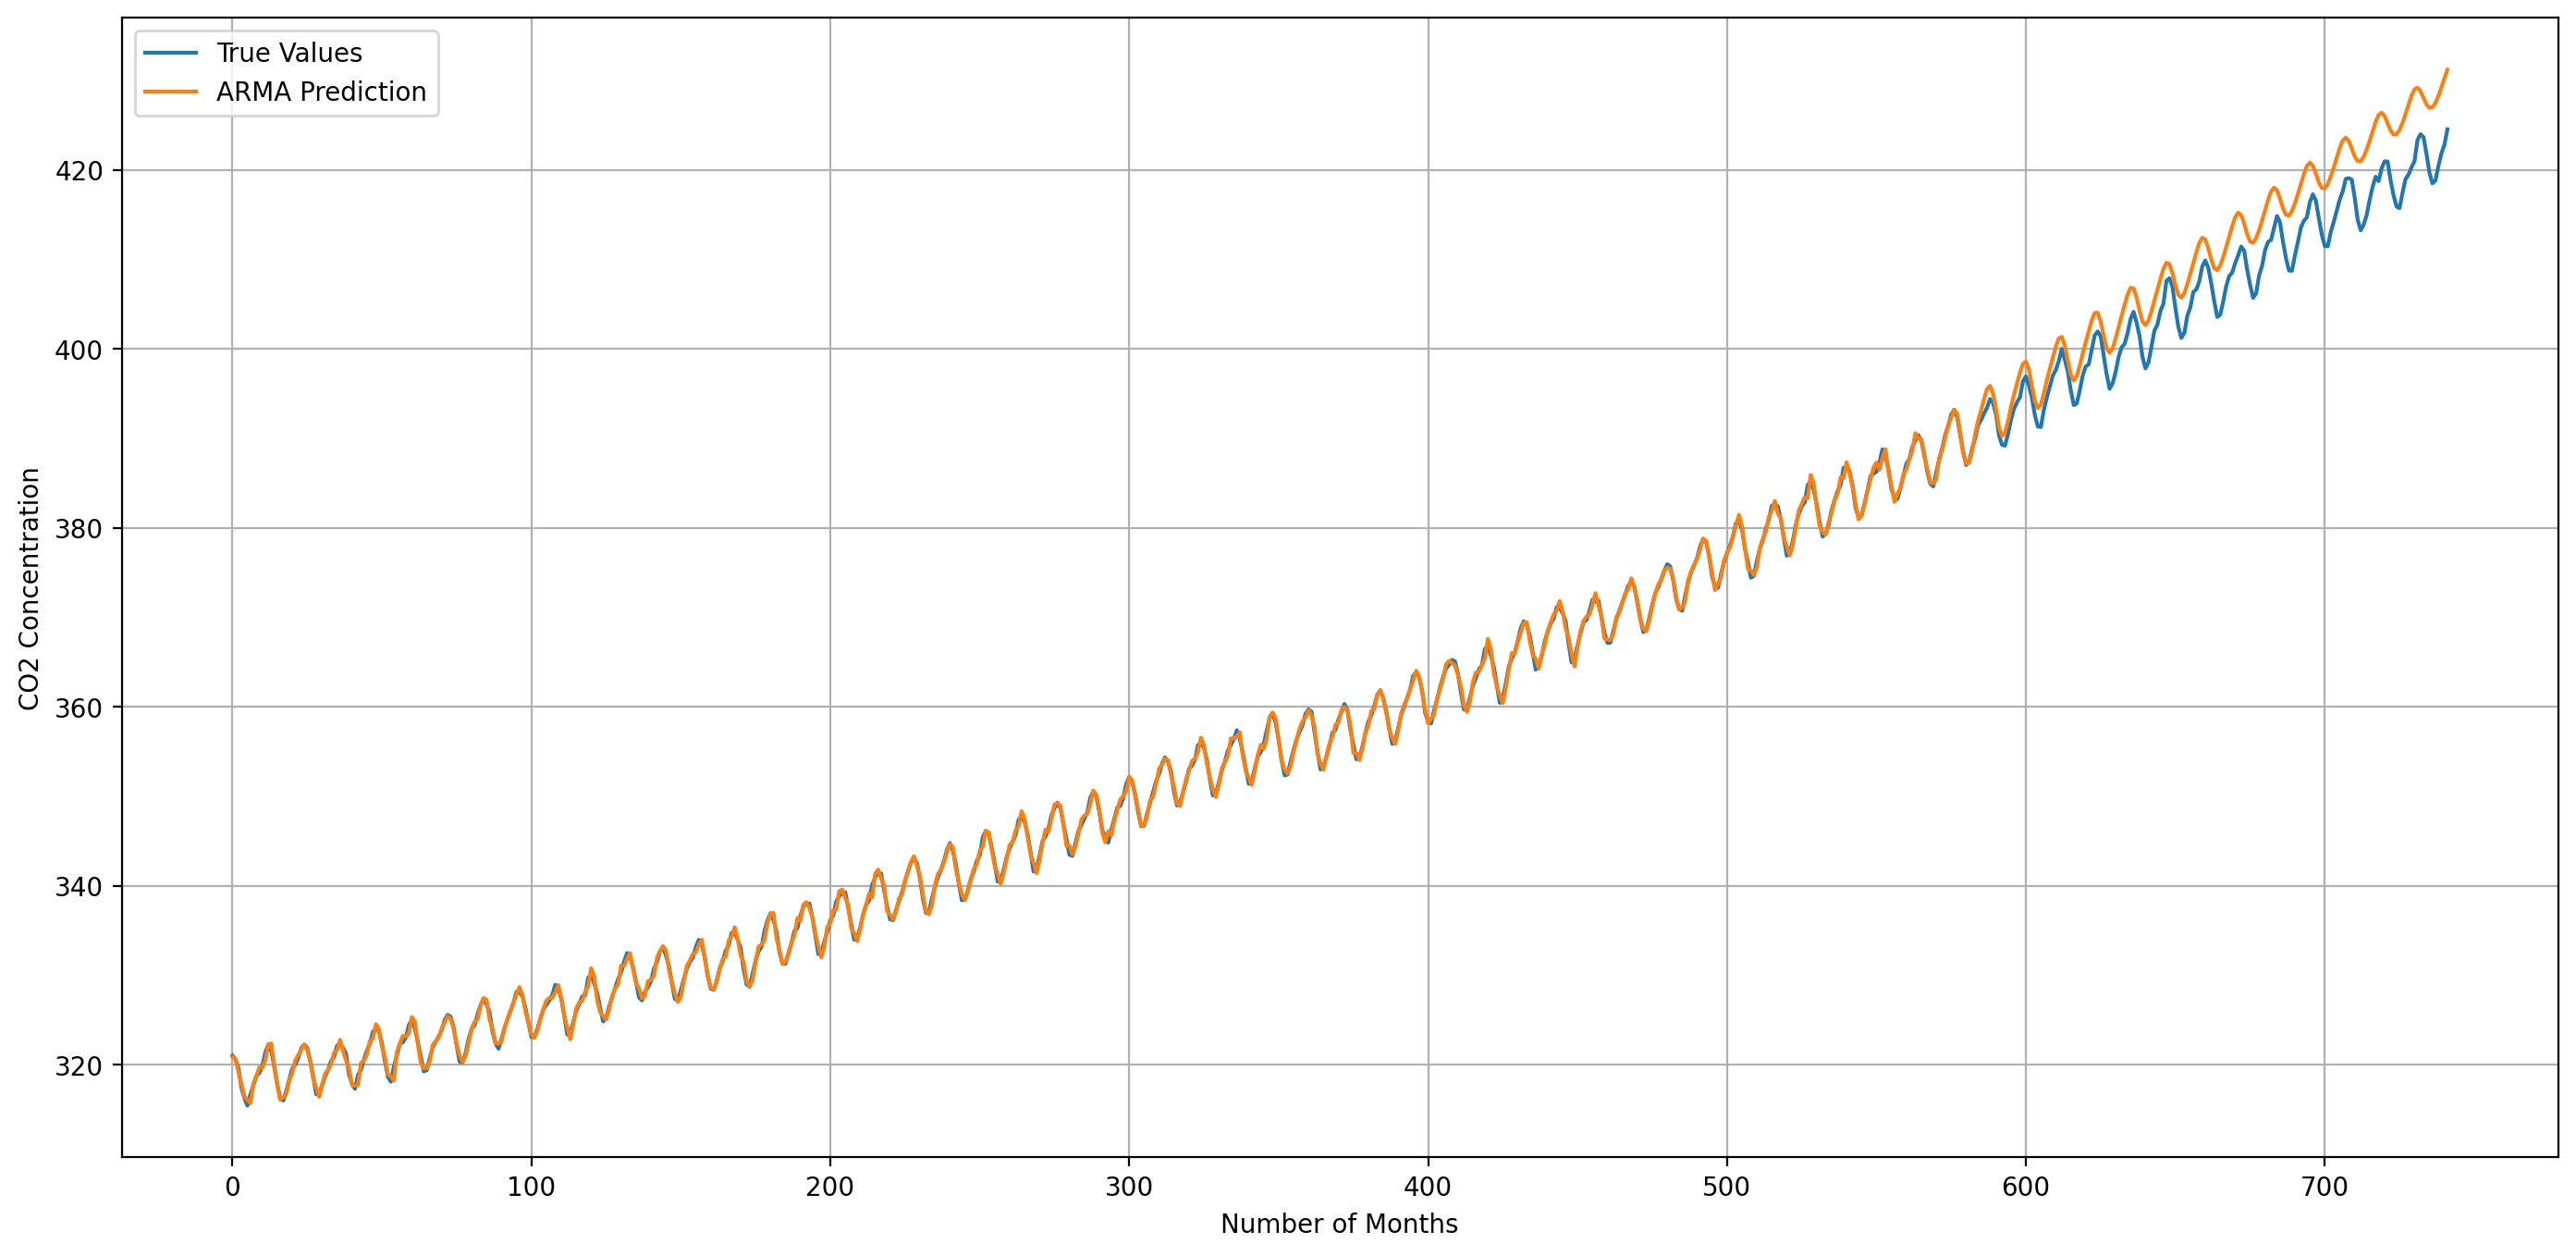

In [25]:
plt.figure(figsize=(17, 8))
plt.plot(y[50:], label='True Values')
plt.plot(ARMA_pred[50:], label='ARMA Prediction')
plt.xlabel("Number of Months")
plt.ylabel("CO2 Concentration")
plt.grid()
plt.legend()
plt.show()

**MSE between ARMA and dataset average (y)**

In [26]:
print(f"MSE between ARMA and dataset average (y): {mse(ARMA_pred,y)}")

MSE between ARMA and dataset average (y): 160.9975570687805


In [27]:
print(f"MSE between ARMA and  Moving Average: {mse(moving_avg_pred,ARMA_pred)}")

MSE between ARMA and  Moving Average: 99.48353528968858


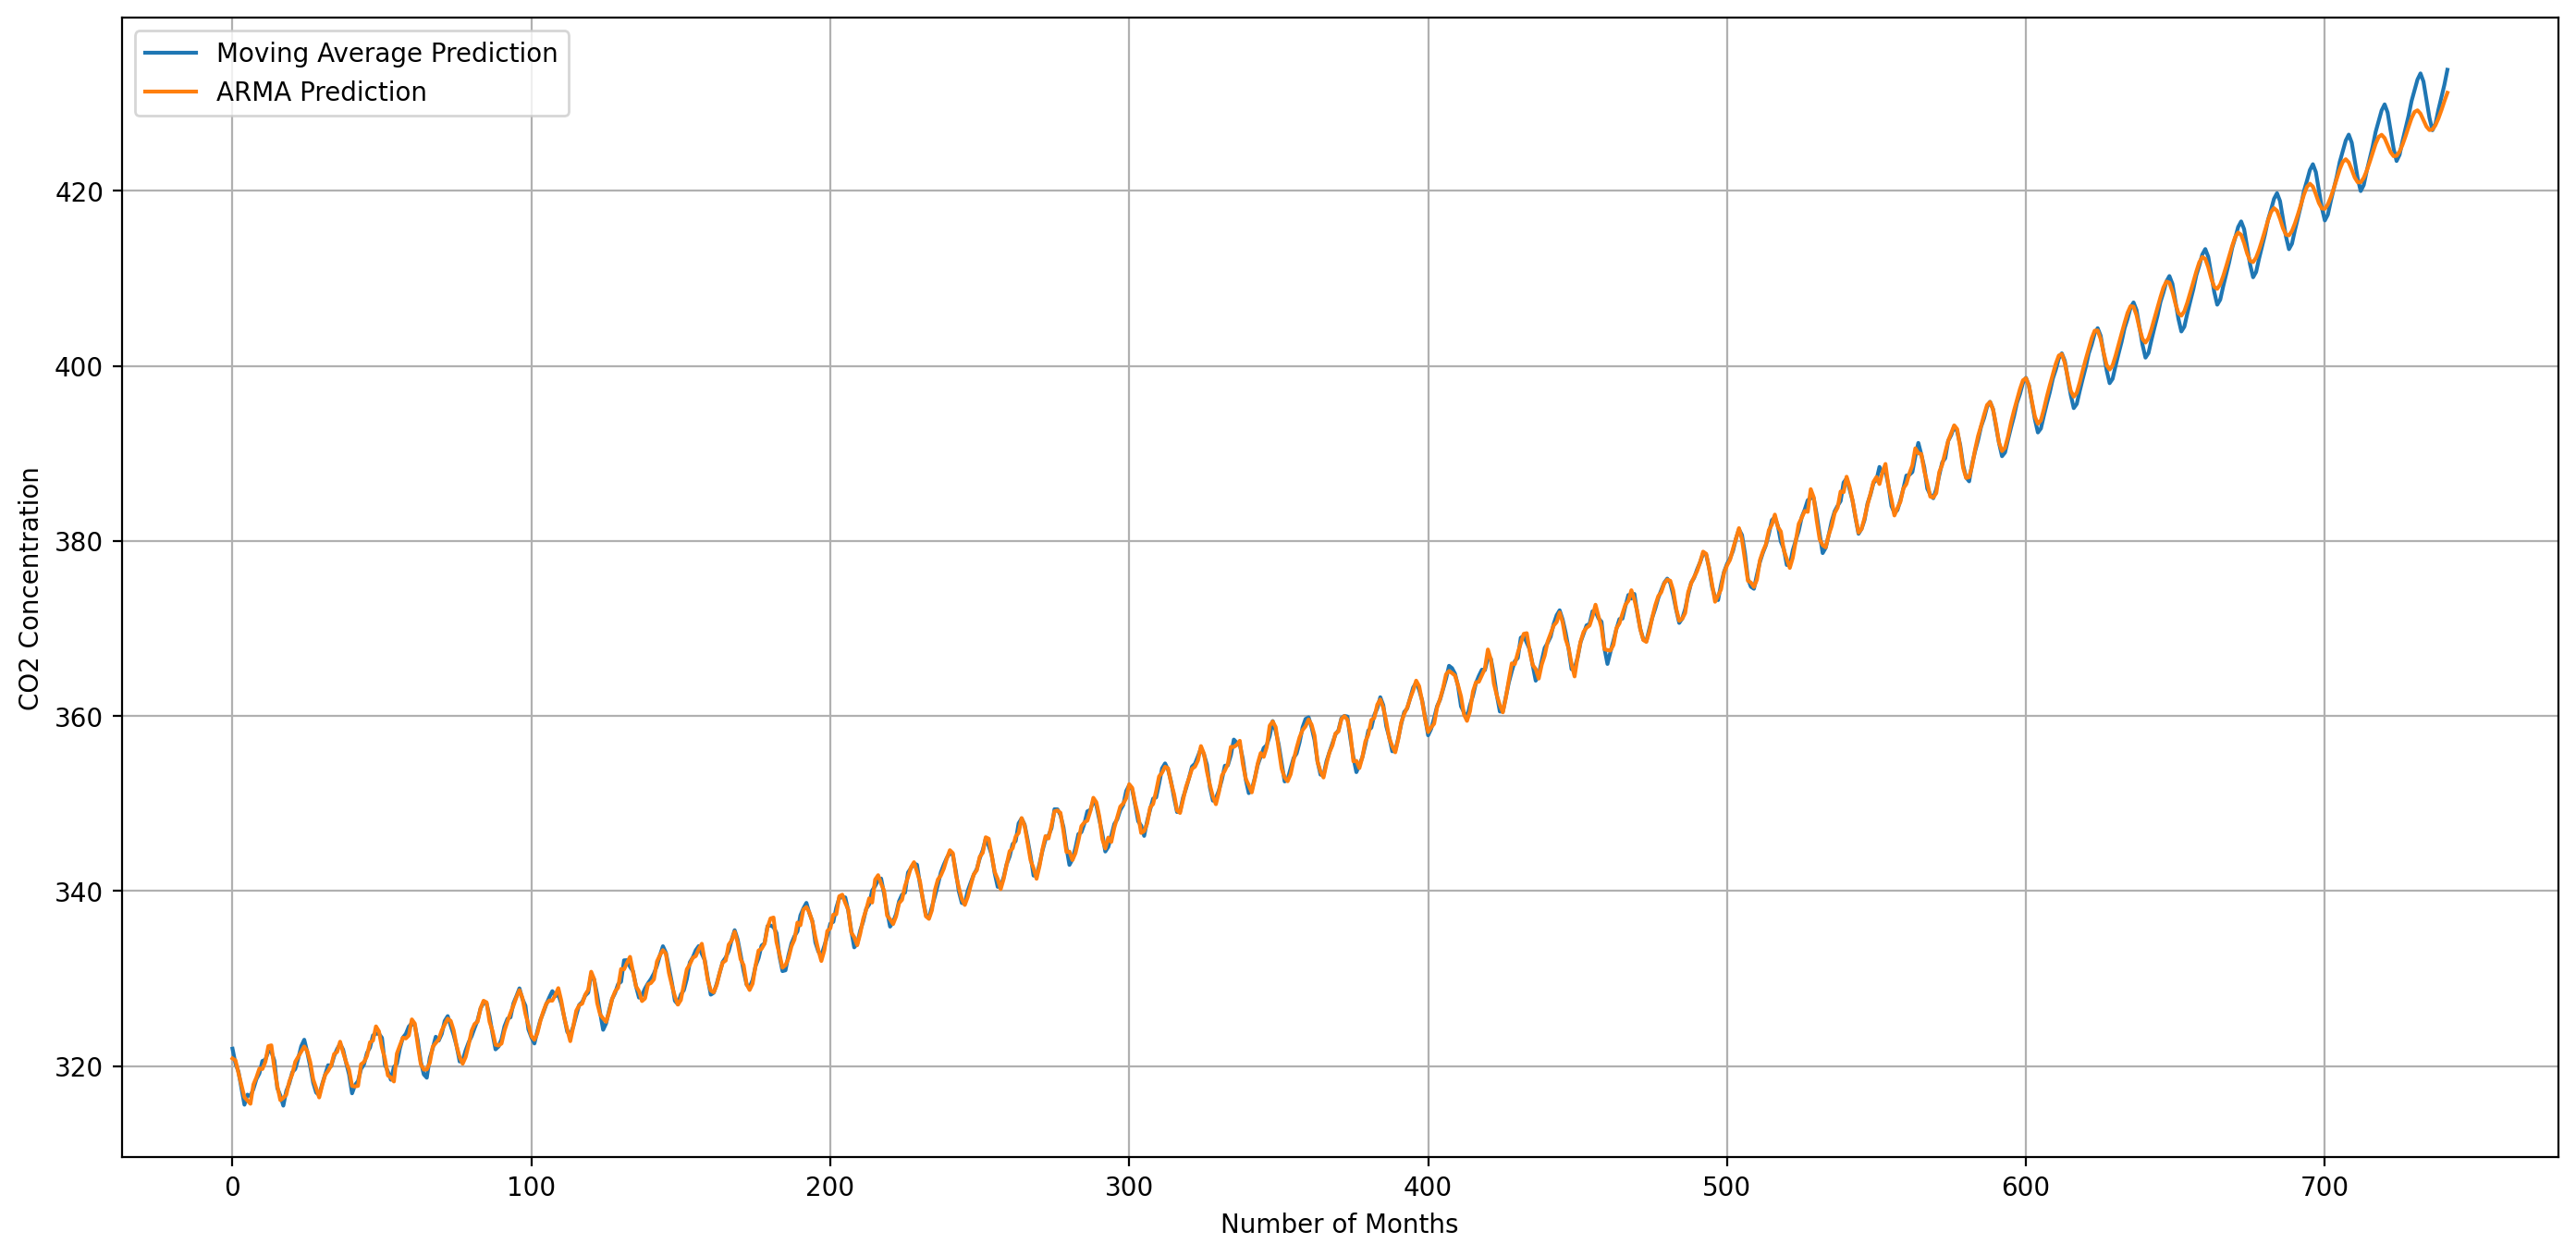

In [28]:
plt.figure(figsize=(17, 8))
plt.plot(moving_avg_pred[50:], label='Moving Average Prediction')
plt.plot(ARMA_pred[50:], label='ARMA Prediction')
plt.xlabel("Number of Months")
plt.ylabel("CO2 Concentration")
plt.grid()
plt.legend()
plt.show()

# **Observation**
**MSE between *Moving Average* and *Dataset Average (y)*: `292.64060314143813`.<br><br>**
**MSE between *ARMA* and *Dataset Average (y)*: `160.9975570687805.`<br><br>**
**MSE between *ARMA* and  *Moving Average(y)*: `99.48353528968858`.<br><br>**
**The **ARMA** is a more complex model which it also consider the past values. That is why the MSE between ARMA and MA is `99.48353528968858`.<br><br>**
**Moving Average (MA) smoothes data, reveals the trends. It is simple but may miss long-term patterns. ARMA is more powerful, considering past values and errors.**